<h3 style='color:blue' align='center'>Handling imbalanced data in customer churn prediction</h3>

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

**Load the data**

In [3]:
df = pd.read_csv("customer_churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4825,0921-OHLVP,Male,0,No,No,22,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,No,Electronic check,83.05,1799.3,No
2216,8495-LJDFO,Female,1,No,No,64,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),108.95,7111.3,No
2877,0310-MVLET,Female,0,Yes,Yes,61,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.15,6010.05,Yes
5604,9432-VOFYX,Male,0,No,No,17,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.80,1207,No
5633,1222-LRYKO,Male,0,No,Yes,6,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,26.35,184.05,No


In [4]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

**First of all, drop customerID column as it is of no use**

In [5]:
df.drop('customerID',axis='columns',inplace=True)

In [6]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

**Quick glance at above makes me realize that TotalCharges should be float but it is an object. Let's check what's going on with  this column**

In [7]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

**Ahh... it is string. Lets convert it to numbers**

In [8]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [9]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [10]:
df.shape

(7043, 20)

In [11]:
df.iloc[488].TotalCharges

' '

In [12]:
df[df.TotalCharges!=' '].shape

(7032, 20)

**Remove rows with space in TotalCharges**

In [13]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [14]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [15]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

In [16]:
df1.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [17]:
df1[df1.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


**Data Visualization**

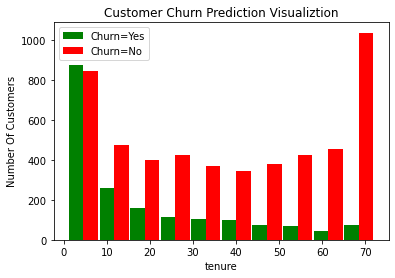

In [18]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")



plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

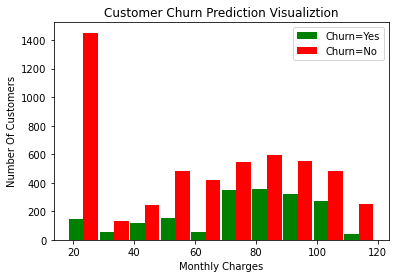

In [19]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges      
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")


plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

**Many of the columns are yes, no etc. Let's print unique values in object columns to see data values**

In [20]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [21]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


**Some of the columns have no internet service or no phone service, that can be replaced with a simple No**

In [22]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

In [23]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


**Convert Yes and No to 1 or 0**

In [24]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

In [25]:
for col in df1:
    print(f'{col}: {df1[col].unique()}') 

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [26]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

In [27]:
df1.gender.unique()

array([1, 0], dtype=int64)

**One hot encoding for categorical columns**

In [28]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [29]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3536,1,0,0,0,1,1,1,0,1,0,...,0,1,0,1,0,0,0,0,0,1
4570,0,0,0,0,7,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
6671,1,0,1,0,59,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,1
1827,1,0,1,1,45,0,0,1,0,0,...,1,0,0,1,0,0,1,0,0,0
3857,0,0,0,0,5,1,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0


In [30]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [31]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [32]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

**Train test split**

In [33]:
df2.Churn.astype(np.float32)

0       0.0
1       0.0
2       1.0
3       0.0
4       1.0
       ... 
7038    0.0
7039    0.0
7040    0.0
7041    1.0
7042    0.0
Name: Churn, Length: 7032, dtype: float32

In [34]:
X = df2.drop('Churn',axis='columns')
y = testLabels = df2.Churn.astype(np.float32)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [35]:
y_train.value_counts()

0.0    4130
1.0    1495
Name: Churn, dtype: int64

In [36]:
y.value_counts()

0.0    5163
1.0    1869
Name: Churn, dtype: int64

In [37]:
y_test.value_counts()

0.0    1033
1.0     374
Name: Churn, dtype: int64

In [38]:
X_train.shape

(5625, 26)

In [39]:
X_test.shape

(1407, 26)

In [40]:
len(X_train.columns)

26

**Build a model (ANN) in tensorflow/keras**

In [41]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report

In [42]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight=weights)
    
    # print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [43]:
y_preds = ANN(X_train.values, y_train.values, X_test.values, y_test.values, 'binary_crossentropy', -1)

Train on 5625 samples
Epoch 1/100
5625/5625 [==============================] - 4s 685us/sample - loss: 0.4945 - accuracy: 0.7639
Epoch 2/100
5625/5625 [==============================] - 1s 211us/sample - loss: 0.4296 - accuracy: 0.7911
Epoch 3/100
5625/5625 [==============================] - 1s 210us/sample - loss: 0.4224 - accuracy: 0.8011
Epoch 4/100
5625/5625 [==============================] - 1s 210us/sample - loss: 0.4184 - accuracy: 0.7996
Epoch 5/100
5625/5625 [==============================] - 1s 210us/sample - loss: 0.4177 - accuracy: 0.8000
Epoch 6/100
5625/5625 [==============================] - 2s 285us/sample - loss: 0.4126 - accuracy: 0.8043
Epoch 7/100
5625/5625 [==============================] - 2s 414us/sample - loss: 0.4108 - accuracy: 0.8034
Epoch 8/100
5625/5625 [==============================] - 2s 397us/sample - loss: 0.4074 - accuracy: 0.8064
Epoch 9/100
5625/5625 [==============================] - 2s 403us/sample - loss: 0.4059 - accuracy: 0.8060
Epoch 10/100
56

5625/5625 [==============================] - 1s 237us/sample - loss: 0.3640 - accuracy: 0.8231
Epoch 77/100
5625/5625 [==============================] - 2s 271us/sample - loss: 0.3621 - accuracy: 0.8219
Epoch 78/100
5625/5625 [==============================] - 2s 270us/sample - loss: 0.3613 - accuracy: 0.8249
Epoch 79/100
5625/5625 [==============================] - 1s 236us/sample - loss: 0.3630 - accuracy: 0.8231
Epoch 80/100
5625/5625 [==============================] - 1s 246us/sample - loss: 0.3612 - accuracy: 0.8247
Epoch 81/100
5625/5625 [==============================] - 2s 314us/sample - loss: 0.3611 - accuracy: 0.8238
Epoch 82/100
5625/5625 [==============================] - 2s 321us/sample - loss: 0.3600 - accuracy: 0.8258
Epoch 83/100
5625/5625 [==============================] - 2s 344us/sample - loss: 0.3596 - accuracy: 0.8217
Epoch 84/100
5625/5625 [==============================] - 2s 329us/sample - loss: 0.3593 - accuracy: 0.8268
Epoch 85/100
5625/5625 [=================

In [44]:
# from above reports we can observe that for 1 class precision, recall and f1score is very low
# due to imbalance in data set
# precesion stands on predictions
# recall stands on true values
# suppose precision for 1 class is no, of correct 1 predictions to total no of 1 predictions
# recall for 1 class is no, of correct 1 predictions to total no of true 1,s

# due to imbalance in dataset lets do something to get accurate results

## Mitigating Skewdness of Data

### Method 1: Undersampling

In [45]:
# Class count
count_class_0, count_class_1 = df2.Churn.value_counts()

# Divide by class
df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

In [46]:
df_class_0.shape, df_class_1.shape

((5163, 27), (1869, 27))

In [47]:
count_class_0, count_class_1

(5163, 1869)

In [48]:
# sample function will randomly select samples
df_class_0.sample(count_class_1).shape

(1869, 27)

In [49]:
# class 0 contains many samples so we undersample class 0 to the same samples as class_1
# Undersample 0-class and concat the class_1 DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)

# axis=0 means concating below(one by one in depth wise)
# axis=1 means concating side by side
df_under = pd.concat([df_class_0_under, df_class_1], ignore_index=True, axis=0)

print('Random under-sampling:')
print(df_under.Churn.value_counts())

Random under-sampling:
1    1869
0    1869
Name: Churn, dtype: int64


In [50]:
X = df_under.drop('Churn',axis='columns')
y = df_under['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [51]:
# stratify argument will balance the samples 
# from X_train and X_test will have balanced both classes 1 and 0

In [52]:
# Number of classes in training Data
y_train.value_counts()

1    1495
0    1495
Name: Churn, dtype: int64

In [53]:
y_test.value_counts()

1    374
0    374
Name: Churn, dtype: int64

**Printing Classification in the last, Scroll down till the last epoch to watch the classification report**

In [54]:
y_preds = ANN(X_train.values, y_train.values, X_test.values, y_test.values, 'binary_crossentropy', -1)

Train on 2990 samples
Epoch 1/100
2990/2990 [==============================] - 2s 601us/sample - loss: 0.5825 - accuracy: 0.6920
Epoch 2/100
2990/2990 [==============================] - 1s 304us/sample - loss: 0.5013 - accuracy: 0.7595
Epoch 3/100
2990/2990 [==============================] - 1s 384us/sample - loss: 0.4907 - accuracy: 0.7645
Epoch 4/100
2990/2990 [==============================] - 1s 279us/sample - loss: 0.4849 - accuracy: 0.7649
Epoch 5/100
2990/2990 [==============================] - 1s 314us/sample - loss: 0.4797 - accuracy: 0.7699
Epoch 6/100
2990/2990 [==============================] - 1s 318us/sample - loss: 0.4764 - accuracy: 0.7753
Epoch 7/100
2990/2990 [==============================] - 1s 222us/sample - loss: 0.4748 - accuracy: 0.7696
Epoch 8/100
2990/2990 [==============================] - 1s 395us/sample - loss: 0.4738 - accuracy: 0.7766
Epoch 9/100
2990/2990 [==============================] - 1s 344us/sample - loss: 0.4710 - accuracy: 0.7753
Epoch 10/100
29

2990/2990 [==============================] - 1s 346us/sample - loss: 0.4088 - accuracy: 0.8161
Epoch 77/100
2990/2990 [==============================] - 1s 341us/sample - loss: 0.4076 - accuracy: 0.8130
Epoch 78/100
2990/2990 [==============================] - 1s 348us/sample - loss: 0.4077 - accuracy: 0.8137
Epoch 79/100
2990/2990 [==============================] - 1s 346us/sample - loss: 0.4071 - accuracy: 0.8147
Epoch 80/100
2990/2990 [==============================] - 1s 343us/sample - loss: 0.4053 - accuracy: 0.8134
Epoch 81/100
2990/2990 [==============================] - 1s 342us/sample - loss: 0.4046 - accuracy: 0.8184
Epoch 82/100
2990/2990 [==============================] - 1s 341us/sample - loss: 0.4044 - accuracy: 0.8147
Epoch 83/100
2990/2990 [==============================] - 1s 343us/sample - loss: 0.4040 - accuracy: 0.8167
Epoch 84/100
2990/2990 [==============================] - 1s 340us/sample - loss: 0.4044 - accuracy: 0.8157
Epoch 85/100
2990/2990 [=================

In [55]:
# the precision, recall and f1-score for 1 class is improved than before

### Method2: Oversampling

In [56]:
# oversample 1-class to the samples equal to class-0 class
# Oversample 1-class and concat the DataFrames of both classes
# by providing replace=True it will duplicate the samples

df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_over = pd.concat([df_class_0, df_class_1_over], ignore_index=True, axis=0)

print('Random over-sampling:')
print(df_over.Churn.value_counts())

Random over-sampling:
1    5163
0    5163
Name: Churn, dtype: int64


In [57]:
df_over.shape 

(10326, 27)

In [58]:
count_class_0 + count_class_0

10326

In [59]:
X = df_over.drop('Churn',axis='columns')
y = df_over['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [60]:
# Number of classes in training Data data is distributed equally
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [61]:
y_test.value_counts()

1    1033
0    1033
Name: Churn, dtype: int64

In [62]:
loss = keras.losses.BinaryCrossentropy()
weights = -1
y_preds = ANN(X_train.values, y_train.values, X_test.values, y_test.values, 'binary_crossentropy', -1)

Train on 8260 samples
Epoch 1/100
8260/8260 [==============================] - 3s 348us/sample - loss: 0.5481 - accuracy: 0.7252
Epoch 2/100
8260/8260 [==============================] - 2s 220us/sample - loss: 0.4949 - accuracy: 0.7581
Epoch 3/100
8260/8260 [==============================] - 3s 319us/sample - loss: 0.4861 - accuracy: 0.7655
Epoch 4/100
8260/8260 [==============================] - 3s 347us/sample - loss: 0.4801 - accuracy: 0.7676
Epoch 5/100
8260/8260 [==============================] - 3s 357us/sample - loss: 0.4762 - accuracy: 0.7701
Epoch 6/100
8260/8260 [==============================] - 2s 284us/sample - loss: 0.4728 - accuracy: 0.7726
Epoch 7/100
8260/8260 [==============================] - 2s 297us/sample - loss: 0.4688 - accuracy: 0.7755
Epoch 8/100
8260/8260 [==============================] - 2s 239us/sample - loss: 0.4658 - accuracy: 0.7747
Epoch 9/100
8260/8260 [==============================] - 2s 239us/sample - loss: 0.4629 - accuracy: 0.7772
Epoch 10/100
82

8260/8260 [==============================] - 3s 344us/sample - loss: 0.3724 - accuracy: 0.8320
Epoch 77/100
8260/8260 [==============================] - 3s 342us/sample - loss: 0.3718 - accuracy: 0.8322
Epoch 78/100
8260/8260 [==============================] - 3s 345us/sample - loss: 0.3711 - accuracy: 0.8314
Epoch 79/100
8260/8260 [==============================] - 3s 344us/sample - loss: 0.3709 - accuracy: 0.8332
Epoch 80/100
8260/8260 [==============================] - 3s 343us/sample - loss: 0.3703 - accuracy: 0.8322
Epoch 81/100
8260/8260 [==============================] - 3s 344us/sample - loss: 0.3708 - accuracy: 0.8300
Epoch 82/100
8260/8260 [==============================] - 3s 351us/sample - loss: 0.3700 - accuracy: 0.8299
Epoch 83/100
8260/8260 [==============================] - 3s 356us/sample - loss: 0.3673 - accuracy: 0.8358
Epoch 84/100
8260/8260 [==============================] - 2s 292us/sample - loss: 0.3663 - accuracy: 0.8338
Epoch 85/100
8260/8260 [=================

In [63]:
# the overall accuracy remains same but precision, recall and f1-score for class-1 is increased

In [64]:
y_preds.reshape(-1)

array([1., 0., 1., ..., 1., 0., 1.], dtype=float32)

### Method3: SMOTE

To install imbalanced-learn library use **pip install imbalanced-learn** command

In [66]:
# smote is similar to oversampling the samples equal to majority of class
# but it not produce duplicates instead it produce synthetic samples equal to majority class samples
# smote produces new samples out of current samples it will simply duplicate the samples
# it uses k-nearest-neighbours algo

In [67]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [68]:
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [69]:
# now smote will oversample class-1 to 5163 samples
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

1    5163
0    5163
Name: Churn, dtype: int64

In [70]:
type(X_sm)

pandas.core.frame.DataFrame

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [72]:
# Number of classes in training Data
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [73]:
y_test.value_counts()

1    1033
0    1033
Name: Churn, dtype: int64

In [74]:
y_preds = ANN(X_train.values, y_train.values, X_test.values, y_test.values, 'binary_crossentropy', -1)

Train on 8260 samples
Epoch 1/100
8260/8260 [==============================] - 3s 335us/sample - loss: 0.5434 - accuracy: 0.7241
Epoch 2/100
8260/8260 [==============================] - 2s 257us/sample - loss: 0.4732 - accuracy: 0.7763
Epoch 3/100
8260/8260 [==============================] - 3s 344us/sample - loss: 0.4638 - accuracy: 0.7798
Epoch 4/100
8260/8260 [==============================] - 3s 348us/sample - loss: 0.4556 - accuracy: 0.7873
Epoch 5/100
8260/8260 [==============================] - 3s 344us/sample - loss: 0.4491 - accuracy: 0.7926
Epoch 6/100
8260/8260 [==============================] - 3s 346us/sample - loss: 0.4457 - accuracy: 0.7931
Epoch 7/100
8260/8260 [==============================] - 3s 307us/sample - loss: 0.4402 - accuracy: 0.7933
Epoch 8/100
8260/8260 [==============================] - 2s 239us/sample - loss: 0.4360 - accuracy: 0.8000
Epoch 9/100
8260/8260 [==============================] - 2s 300us/sample - loss: 0.4318 - accuracy: 0.8031
Epoch 10/100
82

8260/8260 [==============================] - 3s 378us/sample - loss: 0.3466 - accuracy: 0.8487
Epoch 77/100
8260/8260 [==============================] - 3s 345us/sample - loss: 0.3464 - accuracy: 0.8489
Epoch 78/100
8260/8260 [==============================] - 3s 338us/sample - loss: 0.3428 - accuracy: 0.8525
Epoch 79/100
8260/8260 [==============================] - 3s 364us/sample - loss: 0.3451 - accuracy: 0.8517
Epoch 80/100
8260/8260 [==============================] - 3s 392us/sample - loss: 0.3435 - accuracy: 0.8523
Epoch 81/100
8260/8260 [==============================] - 3s 396us/sample - loss: 0.3441 - accuracy: 0.8512
Epoch 82/100
8260/8260 [==============================] - 3s 412us/sample - loss: 0.3430 - accuracy: 0.8505
Epoch 83/100
8260/8260 [==============================] - 3s 388us/sample - loss: 0.3441 - accuracy: 0.8512
Epoch 84/100
8260/8260 [==============================] - 3s 397us/sample - loss: 0.3424 - accuracy: 0.8527
Epoch 85/100
8260/8260 [=================

In [75]:
# smote is better than simple oversampling, oversampling is simple duplication but smote is not

### Method4: Use of Ensemble with undersampling

In [76]:
df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [77]:
# Regain Original features and labels
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [79]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [80]:
4130/1495

2.762541806020067

In [81]:
1495+1495

2990

In [82]:
# so approxmately we divide 3 parts
# 0:1495, 1495:1495+1495, 2990:

In [83]:
y_test.value_counts()

0    1033
1     374
Name: Churn, dtype: int64

model1 --> class1(1495) + class0(0, 1495)

model2 --> class1(1495) + class0(1496, 2990)

model3 --> class1(1495) + class0(2990, 4130)

In [84]:
# first we divide the train and test samples
# then we join X_train, y_train into one data frame named df3
# then we under sample majotity class into equal parts
# we are creating 3 models from training data, we are not createing models directly from the given data
# in all three models test data is same but we divide the training data
# after dividing the the three models we merge the least ones with majority ones three different times

In [85]:
df3 = X_train.copy()
df3['Churn'] = y_train

In [86]:
df3.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
684,1,0,0,0,0.000000,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
2446,1,0,0,0,0.239437,1,1,0,1,0,...,1,0,1,0,0,0,1,0,0,1
1680,0,0,1,1,0.774648,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2220,0,0,1,0,1.000000,1,0,1,1,0,...,0,0,0,0,1,1,0,0,0,0
2842,1,0,0,0,0.042254,0,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0


In [87]:
df3_class_0 = df3[df3.Churn==0]
df3_class_1 = df3[df3.Churn==1]

In [88]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], ignore_index=True, axis=0)

    X_train = df_train.drop('Churn', axis='columns')
    y_train = df_train.Churn
    return X_train, y_train    

In [89]:
X_train, y_train = get_train_batch(df3_class_0, df3_class_1, 0, 1495)

y_pred1 = ANN(X_train.values, y_train.values, X_test.values, y_test.values, 'binary_crossentropy', -1)

Train on 2990 samples
Epoch 1/100
2990/2990 [==============================] - 2s 615us/sample - loss: 0.6402 - accuracy: 0.6308
Epoch 2/100
2990/2990 [==============================] - 1s 265us/sample - loss: 0.5320 - accuracy: 0.7485
Epoch 3/100
2990/2990 [==============================] - 1s 343us/sample - loss: 0.5053 - accuracy: 0.7585
Epoch 4/100
2990/2990 [==============================] - 1s 342us/sample - loss: 0.4936 - accuracy: 0.7649
Epoch 5/100
2990/2990 [==============================] - 1s 346us/sample - loss: 0.4906 - accuracy: 0.7652
Epoch 6/100
2990/2990 [==============================] - 1s 345us/sample - loss: 0.4837 - accuracy: 0.7656
Epoch 7/100
2990/2990 [==============================] - 1s 239us/sample - loss: 0.4813 - accuracy: 0.7699
Epoch 8/100
2990/2990 [==============================] - 1s 234us/sample - loss: 0.4772 - accuracy: 0.7692
Epoch 9/100
2990/2990 [==============================] - 1s 279us/sample - loss: 0.4757 - accuracy: 0.7722
Epoch 10/100
29

2990/2990 [==============================] - 1s 396us/sample - loss: 0.3993 - accuracy: 0.8281
Epoch 77/100
2990/2990 [==============================] - 1s 350us/sample - loss: 0.3972 - accuracy: 0.8214
Epoch 78/100
2990/2990 [==============================] - 1s 344us/sample - loss: 0.3980 - accuracy: 0.8204
Epoch 79/100
2990/2990 [==============================] - 1s 345us/sample - loss: 0.3967 - accuracy: 0.8244
Epoch 80/100
2990/2990 [==============================] - 1s 343us/sample - loss: 0.3968 - accuracy: 0.8237
Epoch 81/100
2990/2990 [==============================] - 1s 344us/sample - loss: 0.3947 - accuracy: 0.8244
Epoch 82/100
2990/2990 [==============================] - 1s 347us/sample - loss: 0.3932 - accuracy: 0.8207
Epoch 83/100
2990/2990 [==============================] - 1s 342us/sample - loss: 0.3930 - accuracy: 0.8254
Epoch 84/100
2990/2990 [==============================] - 1s 346us/sample - loss: 0.3914 - accuracy: 0.8244
Epoch 85/100
2990/2990 [=================

In [92]:
X_train, y_train = get_train_batch(df3_class_0, df3_class_1, 1495, 2990)

y_pred2 = ANN(X_train.values, y_train.values, X_test.values, y_test.values, 'binary_crossentropy', -1)

Train on 2990 samples
Epoch 1/100
2990/2990 [==============================] - 1s 284us/sample - loss: 0.6351 - accuracy: 0.6535
Epoch 2/100
2990/2990 [==============================] - 0s 146us/sample - loss: 0.5270 - accuracy: 0.7495
Epoch 3/100
2990/2990 [==============================] - 0s 151us/sample - loss: 0.5016 - accuracy: 0.7548
Epoch 4/100
2990/2990 [==============================] - 0s 151us/sample - loss: 0.4952 - accuracy: 0.7605
Epoch 5/100
2990/2990 [==============================] - 0s 142us/sample - loss: 0.4907 - accuracy: 0.7609
Epoch 6/100
2990/2990 [==============================] - 0s 148us/sample - loss: 0.4864 - accuracy: 0.7629
Epoch 7/100
2990/2990 [==============================] - 0s 156us/sample - loss: 0.4831 - accuracy: 0.7645
Epoch 8/100
2990/2990 [==============================] - 1s 169us/sample - loss: 0.4812 - accuracy: 0.7672
Epoch 9/100
2990/2990 [==============================] - 0s 159us/sample - loss: 0.4783 - accuracy: 0.7659
Epoch 10/100
29

2990/2990 [==============================] - 0s 139us/sample - loss: 0.3928 - accuracy: 0.8154
Epoch 77/100
2990/2990 [==============================] - 0s 139us/sample - loss: 0.3936 - accuracy: 0.8171
Epoch 78/100
2990/2990 [==============================] - 0s 139us/sample - loss: 0.3934 - accuracy: 0.8194
Epoch 79/100
2990/2990 [==============================] - 0s 139us/sample - loss: 0.3931 - accuracy: 0.8144
Epoch 80/100
2990/2990 [==============================] - 0s 139us/sample - loss: 0.3917 - accuracy: 0.8191
Epoch 81/100
2990/2990 [==============================] - 0s 139us/sample - loss: 0.3911 - accuracy: 0.8157
Epoch 82/100
2990/2990 [==============================] - 0s 135us/sample - loss: 0.3893 - accuracy: 0.8194
Epoch 83/100
2990/2990 [==============================] - 0s 148us/sample - loss: 0.3893 - accuracy: 0.8204
Epoch 84/100
2990/2990 [==============================] - 0s 146us/sample - loss: 0.3887 - accuracy: 0.8171
Epoch 85/100
2990/2990 [=================

In [ ]:
X_train, y_train = get_train_batch(df3_class_0, df3_class_1, 2990, 4130)

y_pred3 = ANN(X_train.values, y_train.values, X_test.values, y_test.values, 'binary_crossentropy', -1)

Train on 2635 samples
Epoch 1/100
2635/2635 [==============================] - 1s 327us/sample - loss: 0.6386 - accuracy: 0.6353
Epoch 2/100
2635/2635 [==============================] - 0s 145us/sample - loss: 0.5123 - accuracy: 0.7620
Epoch 3/100
2635/2635 [==============================] - 0s 160us/sample - loss: 0.4903 - accuracy: 0.7677
Epoch 4/100
2635/2635 [==============================] - 0s 158us/sample - loss: 0.4831 - accuracy: 0.7769
Epoch 5/100
2635/2635 [==============================] - 0s 142us/sample - loss: 0.4783 - accuracy: 0.7769
Epoch 6/100
2635/2635 [==============================] - 0s 142us/sample - loss: 0.4743 - accuracy: 0.7814
Epoch 7/100
2635/2635 [==============================] - 0s 144us/sample - loss: 0.4702 - accuracy: 0.7772
Epoch 8/100
2635/2635 [==============================] - 0s 143us/sample - loss: 0.4697 - accuracy: 0.7852
Epoch 9/100
2635/2635 [==============================] - 0s 142us/sample - loss: 0.4674 - accuracy: 0.7841
Epoch 10/100
26

In [ ]:
len(y_pred1)

In [ ]:
vote1 = 0
vote2 = 0
vote3 = 0

vote1+vote2+vote3

In [ ]:
vote1 = 0
vote2 = 0
vote3 = 1

vote1+vote2+vote3

In [ ]:
vote1 = 0
vote2 = 1
vote3 = 1

vote1+vote2+vote3

In [ ]:
vote1 = 1
vote2 = 1
vote3 = 1

vote1+vote2+vote3

In [ ]:
# if sum of votes is less than 1 then majority vote is 0
# if sum of votes is greater than 1 then majority vote is 1

In [ ]:
y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [ ]:
cl_rep = classification_report(y_test, y_pred_final)
print(cl_rep)

In [ ]:
# f1-score is improved a little but not that much like smote, so smote is best one